In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import random

In [2]:
#read two csv files that contain data about the required fields
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#take sample of 10 random values
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
673,674,1,2,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.0000,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S


In [4]:
#take ranom sample of 10 values
test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,1149,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.0500,NaN,S
67,959,1,"Moore, Mr. Clarence Bloomfield",male,47.0,0,0,113796,42.4000,NaN,S
94,986,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C
228,1120,3,"Everett, Mr. Thomas James",male,40.5,0,0,C.A. 6212,15.1000,NaN,S
381,1273,3,"Foley, Mr. Joseph",male,26.0,0,0,330910,7.8792,NaN,Q
157,1049,3,"Lundin, Miss. Olga Elida",female,23.0,0,0,347469,7.8542,NaN,S
31,923,2,"Jefferys, Mr. Clifford Thomas",male,24.0,2,0,C.A. 31029,31.5000,NaN,S
182,1074,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18.0,1,0,113773,53.1000,D30,S
11,903,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0000,NaN,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [5]:
#we create data frame to get number of rows and colums that exist within the frame
train.shape, test.shape

((891, 12), (418, 11))

In [6]:
# information instance
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#information instance
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


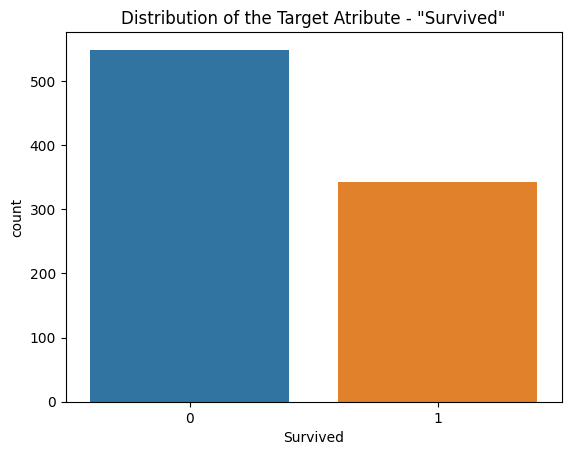

In [11]:
sns.countplot(x='Survived', data=train)
plt.title('Distribution of the Target Atribute - "Survived"')
plt.show()

In [12]:
print('Number of occurances: ')
print(train['Survived'].value_counts())

print('\nPercentage of occurances: ')
print(train['Survived'].value_counts(normalize=True) * 100)

Number of occurances: 
0    549
1    342
Name: Survived, dtype: int64

Percentage of occurances: 
0    61.616162
1    38.383838
Name: Survived, dtype: float64


In [13]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [15]:
numeric_cols = ['Age', 'Fare']
category_cols = ['Pclass', 'Sex', 'Cabin', 'SibSp', 'Parch', 'Embarked']

In [16]:
def dist_plot(df, columns, type='boxplot', label=None):
    plt.figure(figsize=(12,6))
    for idx, var in enumerate(columns):
        plt.subplot(3, 3, idx + 1)
        if (type == 'boxplot'):
            if not label:
                g = sns.boxplot(x=var, data=df, showfliers=True)
            else:
                g = sns.boxplot(y=var, data=df, showfliers=True, x=label)
        elif (type=='histplot'):
            if not label:
                g = sns.histplot(x=var, data=df)
            else:
                g = sns.histplot(x=var, data=df, hue=label)
    plt.tight_layout()

def count_plot(df, columns, label=None):
    plt.figure(figsize=(12, 6))
    for idx, var in enumerate(columns):
        plt.subplot(3, 3, idx + 1)
        if not label:
            g = sns.countplot(x=var, data=df)
        else:
            g = sns.countplot(x=var, data=df, hue = label)
    plt.tight_layout()

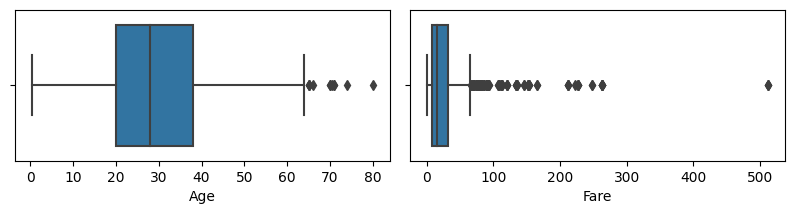

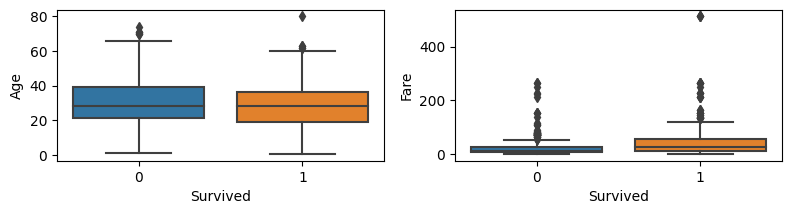

In [17]:
dist_plot(train, numeric_cols)
dist_plot(train, numeric_cols, label='Survived')

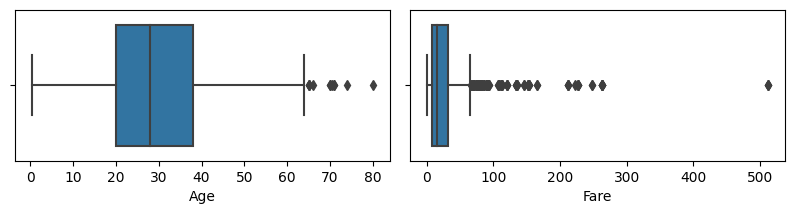

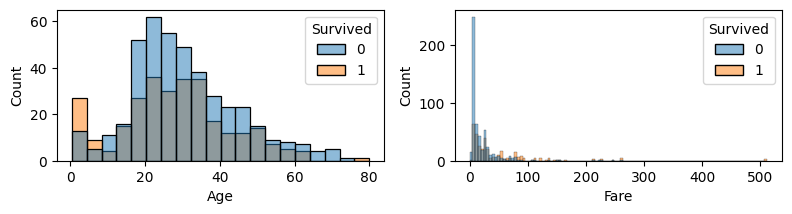

In [18]:
dist_plot(train, numeric_cols)
dist_plot(train, numeric_cols, label='Survived', type='histplot')

In [19]:
def percentage_calc(df, by, agg):
    temp = df.groupby([by])[agg].transform('sum')
    pct = round((df[agg]/temp) * 100, 2).astype('str') + '%'
    return pct

def create_group(df, grp_cols, agg_func='count', temp = 'PassengerId'):
    df_grp = df.groupby(grp_cols).aggregate({temp: agg_func}).reset_index()
    grp_cols.append('Agg')
    df_grp.columns = grp_cols
    return df_grp

In [20]:
train_sex_grp = create_group(train, ['Sex', 'Survived'])
train_sex_grp['PCT'] = percentage_calc(train_sex_grp, 'Sex', 'Agg')

train_sex_grp

,Sex,Survived,Agg,PCT
0,female,0,81,25.8%
1,female,1,233,74.2%
2,male,0,468,81.11%
3,male,1,109,18.89%


In [21]:
train_class_grp = create_group(train, ['Pclass', 'Survived', 'Sex'])
train_class_grp['PCT'] = percentage_calc(train_class_grp, 'Pclass', 'Agg')

train_class_grp

,Pclass,Survived,Sex,Agg,PCT
0,1,0,female,3,1.39%
1,1,0,male,77,35.65%
2,1,1,female,91,42.13%
3,1,1,male,45,20.83%
4,2,0,female,6,3.26%
5,2,0,male,91,49.46%
6,2,1,female,70,38.04%
7,2,1,male,17,9.24%
8,3,0,female,72,14.66%
9,3,0,male,300,61.1%


In [22]:
train_emb_grp = create_group(train, ['Embarked', 'Survived', 'Sex', 'Pclass'])
train_emb_grp['PCT'] = percentage_calc(train_emb_grp, 'Embarked', 'Agg')

train_emb_grp

,Embarked,Survived,Sex,Pclass,Agg,PCT
0,C,0,female,1,1,0.6%
1,C,0,female,3,8,4.76%
2,C,0,male,1,25,14.88%
3,C,0,male,2,8,4.76%
4,C,0,male,3,33,19.64%
5,C,1,female,1,42,25.0%
6,C,1,female,2,7,4.17%
7,C,1,female,3,15,8.93%
8,C,1,male,1,17,10.12%
9,C,1,male,2,2,1.19%


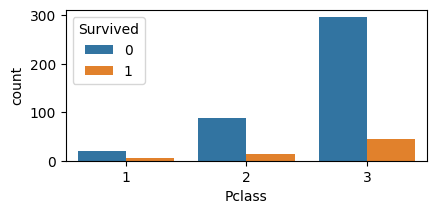

In [23]:
cabin_null = train.loc[(train['Cabin'].isnull()) & (train['Sex'] == 'male')]

count_plot(cabin_null, ['Pclass'], label='Survived')

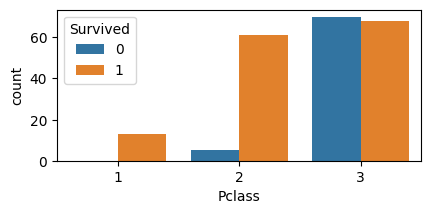

In [24]:
cabin_null = train.loc[(train['Cabin'].isnull()) & (train['Sex'] == 'female')]

count_plot(cabin_null, ['Pclass'], label='Survived')

In [25]:
df_cabin = train.copy()

cabins = df_cabin['Cabin']
df_cabin['Cabin_Series'] = [str(cabin)[0] for cabin in cabins]

df_cabin_surv = df_cabin.loc[df_cabin['Survived'] == 1][['Cabin_Series', 'Pclass']]

print(df_cabin_surv['Cabin_Series'].value_counts(normalize=True))

n    0.602339
C    0.102339
B    0.102339
D    0.073099
E    0.070175
F    0.023392
A    0.020468
G    0.005848
Name: Cabin_Series, dtype: float64


In [26]:
df_cabin_class = create_group(df_cabin, ['Cabin_Series', 'Pclass', 'Sex'])
df_cabin_class

,Cabin_Series,Pclass,Sex,Agg
0,A,1,female,1
1,A,1,male,14
2,B,1,female,27
3,B,1,male,20
4,C,1,female,27
5,C,1,male,32
6,D,1,female,16
7,D,1,male,13
8,D,2,female,2
9,D,2,male,2


In [27]:
train.loc[train['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [28]:
train_fare_grp = create_group(train, ['Pclass'], agg_func = 'mean', temp='Fare')

train_fare_grp.columns = ['Pclass', 'Mean_Fare']
train_fare_grp

,Pclass,Mean_Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [29]:
train_age_class = create_group(train, ['Pclass'], agg_func='mean', temp='Age')

train_age_class.columns = ['Pclass', 'Mean_Age']
train_age_class

,Pclass,Mean_Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [30]:
train_age_grp = create_group(train, ['Pclass', 'Sex', 'Survived'], agg_func='mean', temp='Age')

train_age_grp.columns = ['Pclass', 'Sex', 'Survived', 'Mean_Age']
train_age_grp

,Pclass,Sex,Survived,Mean_Age
0,1,female,0,25.666667
1,1,female,1,34.939024
2,1,male,0,44.581967
3,1,male,1,36.248000
4,2,female,0,36.000000
5,2,female,1,28.080882
6,2,male,0,33.369048
7,2,male,1,16.022000
8,3,female,0,23.818182
9,3,female,1,19.329787


In [31]:
train_Sib = create_group(train, ['SibSp', 'Survived'])
train_Sib

,SibSp,Survived,Agg
0,0,0,398
1,0,1,210
2,1,0,97
3,1,1,112
4,2,0,15
5,2,1,13
6,3,0,12
7,3,1,4
8,4,0,15
9,4,1,3


In [32]:
train_Par = create_group(train, ['Parch', 'Survived'])
train_Par

,Parch,Survived,Agg
0,0,0,445
1,0,1,233
2,1,0,53
3,1,1,65
4,2,0,40
5,2,1,40
6,3,0,2
7,3,1,3
8,4,0,4
9,5,0,4


In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline

In [34]:
y_train = train['Survived']
X_train = train.drop(['Survived'], axis=1)
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [36]:
num_columns = ['Age', 'Fare', 'Parch', 'SibSp']

In [37]:
def outlier_treatment(X, columns):
    new_X = X.copy()
    X_treat = new_X[num_columns].fillna(value=0)
    for column in columns:
        Q1 = np.percentile(X_treat[column], 25.)
        Q2 = np.percentile(X_treat[column], 50.)
        Q3 = np.percentile(X_treat[column], 75.)

        cut_off = (Q3-Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        print(upper, lower)
        new_X.loc[(new_X[column] < lower), column] = lower
        new_X.loc[(new_X[column] > upper), column] = upper

    return new_X

In [38]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

78.5 -37.5
65.6344 -26.724


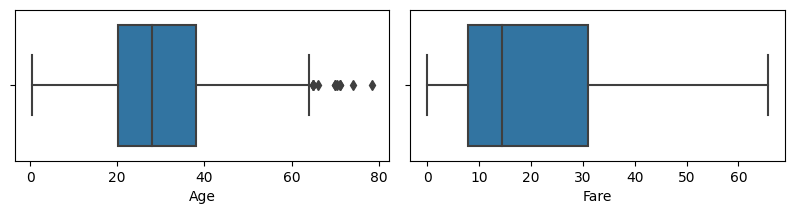

In [39]:
train_out = outlier_treatment(X_train, ['Age', 'Fare'])
dist_plot(train_out, ['Age', 'Fare'])

In [40]:
train_out

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
train_out.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
class CategoryTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cols_to_remove = ['PassengerId', 'Ticket', 'Name']
        self.attr_combo = ['Cabin', 'SibSp', 'Parch']
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        temp = X.copy()
        temp['Cabin_Flag'] = temp['Cabin'].apply(lambda x: 0 if x is np.nan else 1)
        temp['Family'] = temp['SibSp'] + temp['Parch']
        for i in range(len(self.attr_combo)):
            self.cols_to_remove.append(self.attr_combo[i])
        new_X = temp.drop(self.cols_to_remove, axis=1)
        other_cols = ['Age', 'Fare', 'Embarked', 'Sex']
        trans_X = new_X.drop(other_cols, axis=1)
        return trans_X.to_numpy()

In [43]:
cat_trans = CategoryTransformer()
train_attr = cat_trans.transform(train_out)

train_attr

array([[3, 0, 1],
       [1, 1, 1],
       [3, 0, 0],
       ...,
       [3, 0, 3],
       [1, 1, 0],
       [3, 0, 0]])

In [44]:
num_cols = ['Age', 'Fare']
cat_cols = ['Embarked', 'Sex']
all_cols = list(train_out.columns)

In [45]:
imputer1 = SimpleImputer(missing_values=0, strategy='mean')
imputer2 = SimpleImputer(strategy='mean')
imputer3 = SimpleImputer(strategy='most_frequent')

encoder = OneHotEncoder(dtype = 'int')
transformer = CategoryTransformer()

In [46]:
num_pipeline = Pipeline([('imputer2', SimpleImputer(strategy='mean')),
                         ('imputer1', SimpleImputer(missing_values=0, strategy='mean'))
                       ])

clean_pipeline = Pipeline([('transformer', CategoryTransformer())])

cat_pipeline = Pipeline([('imputer3', SimpleImputer(strategy='most_frequent')),
                        ('encoder', OneHotEncoder(dtype = 'int'))])


data_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('clean', clean_pipeline, all_cols),
    ('cat', cat_pipeline, cat_cols)
])

data_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer2', SimpleImputer()),
                                                 ('imputer1',
                                                  SimpleImputer(missing_values=0))]),
                                 ['Age', 'Fare']),
                                ('clean',
                                 Pipeline(steps=[('transformer',
                                                  CategoryTransformer())]),
                                 ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age',
                                  'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
                                  'Embarked']),
                                ('cat',
                                 Pipeline(steps=[('imputer3',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(dtype='int'))]),
                                 ['Embarked', 'Sex'])])

In [47]:
data_prepared = data_pipeline.fit_transform(train_out)

data_prepared

array([[22.        ,  7.25      ,  3.        , ...,  1.        ,
         0.        ,  1.        ],
       [38.        , 65.6344    ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [26.        ,  7.925     ,  3.        , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [29.69701681, 23.45      ,  3.        , ...,  1.        ,
         1.        ,  0.        ],
       [26.        , 30.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [32.        ,  7.75      ,  3.        , ...,  0.        ,
         0.        ,  1.        ]])

In [48]:
data_prepared[0]

array([22.  ,  7.25,  3.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,
        1.  ])

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [50]:
def model_set():
    model_set = []

    model_set.append(('LR', LogisticRegression()))
    model_set.append(('DT', DecisionTreeClassifier()))
    model_set.append(('RF', RandomForestClassifier()))
    model_set.append(('SV', SVC()))
    model_set.append(('EX', ExtraTreesClassifier()))
    model_set.append(('KN', KNeighborsClassifier()))
    model_set.append(('GB', GradientBoostingClassifier()))
    model_set.append(('AB', AdaBoostClassifier()))
    model_set.append(('NB', GaussianNB()))

    return model_set

In [51]:
def score_models(X, y, modelset, scale = None):
    cols = ['Model', 'Accuracy Mean', 'Accuracy STD', 'F1 Score Mean', 'F1 Score STD']

    models = []

    accuracy_mean = []
    accuracy_std = []

    f1_score_mean = []
    f1_score_std = []

    if scale == 'MinMax':
        scale = MinMaxScaler()
        X = scale.fit_transform(X)
    if scale == 'Standard':
        scale = StandardScaler()
        X = scale.fit_transform(X)

    for name, model in modelset:
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        cv_acc = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        cv_f1 = cross_val_score(model, X, y, cv=kfold, scoring='f1')

        models.append(model)

        accuracy_mean.append(cv_acc.mean())
        accuracy_std.append(cv_acc.std())

        f1_score_mean.append(cv_f1.mean())
        f1_score_std.append(cv_f1.std())


    score_matrix = list(zip(models, accuracy_mean, accuracy_std, f1_score_mean, f1_score_std))
    df = pd.DataFrame(data = score_matrix, columns=cols)
    return df

In [52]:
models = model_set()
score_models(data_prepared, y_train, models)

,Model,Accuracy Mean,Accuracy STD,F1 Score Mean,F1 Score STD
0,LogisticRegression(),0.799064,0.037585,0.730350,0.058506
1,DecisionTreeClassifier(),0.776554,0.042493,0.705714,0.056008
2,RandomForestClassifier(),0.810300,0.019960,0.754332,0.050679
3,SVC(),0.691311,0.029392,0.482603,0.056587
4,ExtraTreesClassifier(),0.795693,0.028133,0.720330,0.054042
5,KNeighborsClassifier(),0.725069,0.035247,0.629761,0.048362
6,GradientBoostingClassifier(),0.827116,0.026428,0.756547,0.039828
7,AdaBoostClassifier(),0.805768,0.030879,0.739623,0.047969
8,GaussianNB(),0.765431,0.038417,0.715620,0.039644


In [53]:
score_models(data_prepared, y_train, models, scale = 'MinMax')

,Model,Accuracy Mean,Accuracy STD,F1 Score Mean,F1 Score STD
0,LogisticRegression(),0.794569,0.029987,0.723052,0.048290
1,DecisionTreeClassifier(),0.768714,0.039322,0.704934,0.056730
2,RandomForestClassifier(),0.813658,0.027803,0.744178,0.050296
3,SVC(),0.810275,0.029737,0.703444,0.061947
4,ExtraTreesClassifier(),0.794582,0.039076,0.729528,0.042600
5,KNeighborsClassifier(),0.808027,0.023596,0.734175,0.040073
6,GradientBoostingClassifier(),0.827116,0.026428,0.755399,0.041568
7,AdaBoostClassifier(),0.805768,0.030879,0.739623,0.047969
8,GaussianNB(),0.765431,0.038417,0.715620,0.039644


In [54]:
score_models(data_prepared, y_train, models, scale = 'Standard')

,Model,Accuracy Mean,Accuracy STD,F1 Score Mean,F1 Score STD
0,LogisticRegression(),0.799076,0.035815,0.731140,0.056581
1,DecisionTreeClassifier(),0.765318,0.051891,0.696498,0.053010
2,RandomForestClassifier(),0.811373,0.030364,0.764098,0.044083
3,SVC(),0.810275,0.032184,0.720590,0.054237
4,ExtraTreesClassifier(),0.795693,0.036355,0.721214,0.046818
5,KNeighborsClassifier(),0.802422,0.028323,0.732352,0.039743
6,GradientBoostingClassifier(),0.827116,0.023920,0.756547,0.039828
7,AdaBoostClassifier(),0.805768,0.030879,0.739623,0.047969
8,GaussianNB(),0.765431,0.038417,0.715620,0.039644


In [55]:
def create_ensembles():
    ensembles = []
    ensembles.append(('VC1', VotingClassifier([('LR', LogisticRegression()), ('RF', RandomForestClassifier()), ('SV', SVC())],
                                             voting='hard')))
    ensembles.append(('VC2', VotingClassifier([('EX', ExtraTreesClassifier()), ('KN', KNeighborsClassifier()), ('GB', GradientBoostingClassifier())],
                                             voting='hard')))
    ensembles.append(('VC3', VotingClassifier([('AB', AdaBoostClassifier()), ('SV', SVC()), ('NB', GaussianNB())],
                                             voting='hard')))
    ensembles.append(('VC4', VotingClassifier([('KN', KNeighborsClassifier()), ('AB', AdaBoostClassifier()), ('GB', GradientBoostingClassifier())],
                                             voting='hard')))
    ensembles.append(('VC5', VotingClassifier([('KN', KNeighborsClassifier()), ('SVC', SVC()), ('GB', GradientBoostingClassifier()), ('RF', RandomForestClassifier()),
                                              ('AB', AdaBoostClassifier())], voting='hard')))
    return ensembles

In [56]:
ensemble_list = create_ensembles()
score_models(data_prepared, y_train, ensemble_list)

,Model,Accuracy Mean,Accuracy STD,F1 Score Mean,F1 Score STD
0,"VotingClassifier(estimators=[('LR', LogisticRe...",0.814744,0.041109,0.744106,0.066792
1,"VotingClassifier(estimators=[('EX', ExtraTrees...",0.818140,0.025260,0.752192,0.037429
2,"VotingClassifier(estimators=[('AB', AdaBoostCl...",0.787815,0.043870,0.724136,0.057896
3,"VotingClassifier(estimators=[('KN', KNeighbors...",0.824881,0.026865,0.762657,0.040523
4,"VotingClassifier(estimators=[('KN', KNeighbors...",0.826005,0.025434,0.764442,0.038997


In [57]:
score_models(data_prepared, y_train, ensemble_list, scale = 'MinMax')

,Model,Accuracy Mean,Accuracy STD,F1 Score Mean,F1 Score STD
0,"VotingClassifier(estimators=[('LR', LogisticRe...",0.815880,0.033631,0.724657,0.054981
1,"VotingClassifier(estimators=[('EX', ExtraTrees...",0.822622,0.019664,0.751466,0.039415
2,"VotingClassifier(estimators=[('AB', AdaBoostCl...",0.796779,0.035627,0.721513,0.056631
3,"VotingClassifier(estimators=[('KN', KNeighbors...",0.824869,0.015640,0.756285,0.029391
4,"VotingClassifier(estimators=[('KN', KNeighbors...",0.824869,0.017179,0.752350,0.034753


In [58]:
score_models(data_prepared, y_train, ensemble_list, scale = 'Standard')

,Model,Accuracy Mean,Accuracy STD,F1 Score Mean,F1 Score STD
0,"VotingClassifier(estimators=[('LR', LogisticRe...",0.814757,0.038550,0.736691,0.063476
1,"VotingClassifier(estimators=[('EX', ExtraTrees...",0.821511,0.023503,0.756141,0.042199
2,"VotingClassifier(estimators=[('AB', AdaBoostCl...",0.797903,0.041682,0.728099,0.062231
3,"VotingClassifier(estimators=[('KN', KNeighbors...",0.821498,0.016649,0.752608,0.030439
4,"VotingClassifier(estimators=[('KN', KNeighbors...",0.824869,0.020527,0.759195,0.032809


In [59]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(data_prepared)

In [60]:
models = []
gb = GradientBoostingClassifier()
models.append(gb)

rf = RandomForestClassifier()
models.append(rf)

ab = AdaBoostClassifier()
models.append(ab)

sv = SVC()
models.append(sv)

kn = KNeighborsClassifier()
models.append(kn)

param_grid = [

    {
        'loss': ['log_loss', 'exponential'],
        'n_estimators': [90, 100, 200],
        'max_features': [2, 3, 4],
        'learning_rate': [0.1, 0.5, 1]
    },
    {
        'n_estimators': [80, 100, 200],
        'max_features': [2, 3, 4],
        'criterion': ['gini', 'entropy']
    },
    {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.5, 1]
    },
    {
        'C': [1, 1.5, 2.0],
        'kernel': ['linear', 'poly', 'rbf']
    },
    {
        'n_neighbors': [5, 8, 10],
        'weights': ['uniform', 'distance']
    }

]

In [61]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_predict

In [62]:
model_param_map = dict(zip(models, param_grid))
model_param_map

{GradientBoostingClassifier(): {'loss': ['log_loss', 'exponential'],
  'n_estimators': [90, 100, 200],
  'max_features': [2, 3, 4],
  'learning_rate': [0.1, 0.5, 1]},
 RandomForestClassifier(): {'n_estimators': [80, 100, 200],
  'max_features': [2, 3, 4],
  'criterion': ['gini', 'entropy']},
 AdaBoostClassifier(): {'n_estimators': [50, 100, 200],
  'learning_rate': [0.1, 0.5, 1]},
 SVC(): {'C': [1, 1.5, 2.0], 'kernel': ['linear', 'poly', 'rbf']},
 KNeighborsClassifier(): {'n_neighbors': [5, 8, 10],
  'weights': ['uniform', 'distance']}}

In [63]:
best_estimator_list = []
best_score_list = []
for best in model_param_map.items():
    rand_search = RandomizedSearchCV(best[0], best[1], scoring='accuracy', cv=5)
    rand_search.fit(X_train_scaled, y_train)
    best_estimator_list.append(rand_search.best_estimator_)
    print(rand_search.best_estimator_)
    best_score_list.append(rand_search.best_score_)
    print(rand_search.best_score_)

GradientBoostingClassifier(learning_rate=0.5, loss='exponential',
                           max_features=2, n_estimators=200)
0.8406377502981608
RandomForestClassifier(max_features=4, n_estimators=80)
0.8137216747222397
AdaBoostClassifier(learning_rate=1)
0.8126294645659407
SVC(C=1.5, kernel='poly')
0.8125792480070302
KNeighborsClassifier(n_neighbors=10, weights='distance')
0.8002259745150964


In [64]:
best_models = []
best_gb = GradientBoostingClassifier(loss='exponential', max_features=4, n_estimators=200)
best_models.append(best_gb)
best_rf = RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=200)
best_models.append(best_rf)
best_ab = AdaBoostClassifier(learning_rate=1)
best_models.append(best_ab)
best_svc = SVC(C=1.5, kernel='poly')
best_models.append(best_svc)
best_kn = KNeighborsClassifier(n_neighbors=10, weights='distance')
best_models.append(best_kn)
best_vc = VotingClassifier([('best_gb', GradientBoostingClassifier(loss='exponential', max_features=4, n_estimators=200)),
                           ('best_rf', RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=200)),
                           ('best_ab', AdaBoostClassifier(learning_rate=1)),
                           ('best_svc', SVC(C=1.5, kernel='poly')),
                           ('best_kn', KNeighborsClassifier(n_neighbors=10, weights='distance'))])
best_models.append(best_vc)

In [65]:
def get_model_name(model):
    temp = str(model)
    end = temp.index('(')
    title = temp[0 : end]
    return title

def get_confusion_matrix(models, X_train, y_train):
    plt.figure(figsize=(20,16))
    kfold = StratifiedKFold(shuffle=True, random_state=42)
    for idx, model in enumerate(models):
        f = plt.subplot(6, 6, idx+1)
        y_train_pred = cross_val_predict(model, X_train, y_train, cv=kfold)
        conf_mx = confusion_matrix(y_train, y_train_pred)
        title = get_model_name(model)
        f.set_title(title)
        g = sns.heatmap(conf_mx)
    plt.tight_layout()


def get_classification_scores(models, X_train, y_train):
    model_names = []
    accuracy_scores = []
    recall_scores = []
    precision_scores = []
    f1_scores = []
    roc_auc_scores = []
    kfold = StratifiedKFold(shuffle=True, random_state=42)
    for model in models:
        model_names.append(get_model_name(model))
        y_train_pred = cross_val_predict(model, X_train, y_train, cv=kfold)
        accuracy_scores.append(round(accuracy_score(y_train, y_train_pred) * 100, 2).astype('str') + '%')
        recall_scores.append(round(recall_score(y_train, y_train_pred) * 100, 2).astype('str') + '%')
        precision_scores.append(round(precision_score(y_train, y_train_pred) * 100, 2).astype('str') + '%')
        f1_scores.append(round(f1_score(y_train, y_train_pred) * 100, 2).astype('str') + '%')
        roc_auc_scores.append(round(roc_auc_score(y_train, y_train_pred) * 100, 2).astype('str') + '%')

    metrics = list(zip(model_names, accuracy_scores, recall_scores, precision_scores, f1_scores, roc_auc_scores))
    df = pd.DataFrame(data=metrics, columns = ['Estimators', 'Accuracy', 'Recall', 'Precision', 'F1 Score', 'ROC-AUC-Score'])
    return df

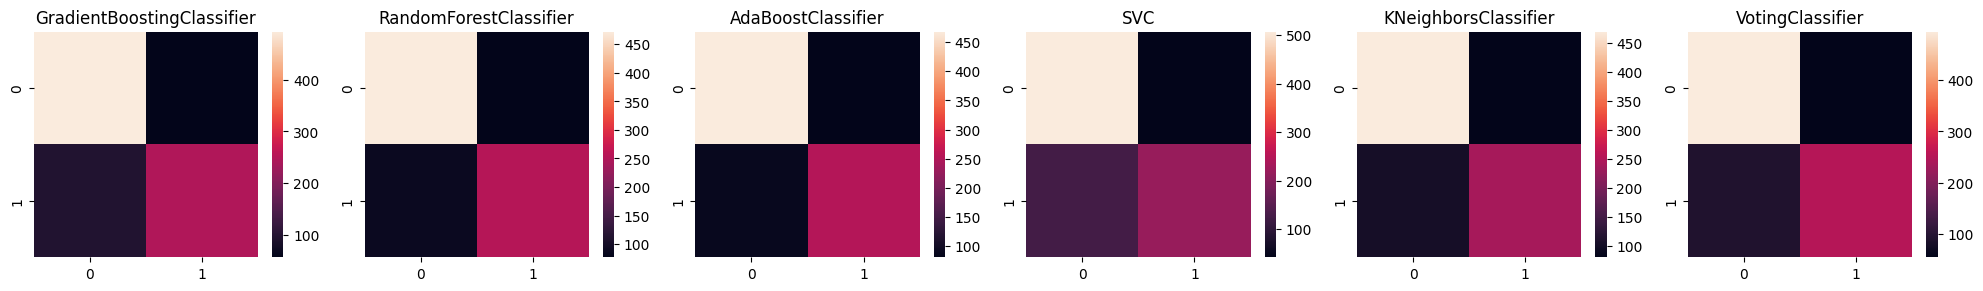

In [66]:
get_confusion_matrix(best_models, X_train_scaled, y_train)

In [67]:
final_pipeline = Pipeline([('preproc', data_pipeline),
                          ('scaler', MinMaxScaler()),
                          ('best_gb', GradientBoostingClassifier(loss='exponential', max_features=4, n_estimators=200))])


final_pipeline

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer2',
                                                                   SimpleImputer()),
                                                                  ('imputer1',
                                                                   SimpleImputer(missing_values=0))]),
                                                  ['Age', 'Fare']),
                                                 ('clean',
                                                  Pipeline(steps=[('transformer',
                                                                   CategoryTransformer())]),
                                                  ['PassengerId', 'Pclass',
                                                   'Name', 'Sex', 'Age',
                                                   'SibSp', 'Parch', 'Ticket',
                                                   'Fare', 'Cabin',
                                                   'Embarked']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer3',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(dtype='int'))]),
                                                  ['Embarked', 'Sex'])])),
                ('scaler', MinMaxScaler()),
                ('best_gb',
                 GradientBoostingClassifier(loss='exponential', max_features=4,
                                            n_estimators=200))])

In [68]:
final_pipeline.fit(train_out, y_train)
predictions = final_pipeline.predict(test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [69]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})
submission.sample(10)

,PassengerId,Survived
138,1030,0
102,994,0
392,1284,0
155,1047,0
262,1154,1
114,1006,1
51,943,0
19,911,0
244,1136,0
355,1247,0
